## Using Tensorflow Learn API for Color Classification

The objectives of this piece of code is to:

- Learn how to perform end-to-end usage of Tensorflow Learn usage.
- Learn how to apply Tensorflow on an arbitrary image dataset other than MNIST/CIFAR-10.

You are highly encouraged to:

- Take a look at the actual data under ./data/input/.
- Tune the parameters such as the train/test size, the number of hidden units, use fewer training data.
- Add immediate print methods to see what the actual values look like.

Since this is an inherently very easy task, you may want to decrease the steps to about 200 to see how the model fails, and increase to 1000 to see how the model works perfectly.

In [1]:
# For reading files.
import os

# For array processing.
import numpy as np

# For handling image as a proper abstraction.
from PIL import Image

# For scoring prediction and creating train/test sets and preprocessing data
from sklearn.metrics import *
from sklearn.model_selection import *
from sklearn.preprocessing import *

# For Tensorflow!
import tensorflow as tf

# For visualization
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Gives more logging to learn what's behind the scenes.
tf.logging.set_verbosity(tf.logging.INFO)

In [3]:
# Define constants for R/G/B.
RED = 0
GREEN = 1
BLUE = 2

We will define some methods for getting the input data classes.

In [4]:
def determine_color_from_filename(filename):
    """
    The color of an image is inferred from the filename. For those filenames
    without an indication, it is assumed to be red.
    """
    if 'blue' in filename.lower():
        return BLUE
    if 'green' in filename.lower():
        return GREEN
    return RED

def to_display_name(value):
    """
    Values back to display name for human reading.
    """
    if value == BLUE:
        return 'blue'
    if value == GREEN:
        return 'green'
    return 'red'

Now, we read from data/input the images as input, and infer the label from the filename.

The image is a PNG and thus has 4 channels: RGBA, but we do not need the Alpha (A) channel, which is used for transparency. As such, we open and convert the image to pure RGC, then wrap it into a numpy array for further processing.

In [5]:
raw_X = []
raw_y = []
for folder_path, folders, filenames in os.walk('data/input'):
    for filename in filenames:
        filepath = os.path.join(folder_path, filename)
        image = Image.open(filepath).convert('RGB')  # Drop alpha channel, not needed.
        image = np.array(image)  # Numpy array is expected by the tensorflow.
        raw_X.append(image)
        raw_y.append(determine_color_from_filename(filename))  # determine if the truth is red/green/blue.

X = np.array(raw_X, dtype='float32')  # Tensorflow models don't work with well with float64.
y = np.array(raw_y, dtype='int32')  # Tensorflow classification classes expects int32.

In [6]:
# Print the shape to make sure we are doing the right thing.
print('X.shape: ', X.shape)
print('y.shape: ', y.shape)

X.shape:  (470, 64, 64, 3)
y.shape:  (470,)


It is always a good idea to print the values to do sanity check. For X, it should always be [0, 255].

In [7]:
X[0, :]

array([[[ 218.,  218.,  218.],
        [ 255.,  255.,  255.],
        [ 255.,  255.,  255.],
        ..., 
        [ 255.,  255.,  255.],
        [ 255.,  255.,  255.],
        [ 255.,  255.,  255.]],

       [[ 203.,  203.,  203.],
        [ 249.,  249.,  249.],
        [ 255.,  255.,  255.],
        ..., 
        [ 255.,  255.,  255.],
        [ 255.,  255.,  255.],
        [ 255.,  255.,  255.]],

       [[ 202.,  202.,  202.],
        [ 244.,  244.,  244.],
        [ 255.,  255.,  255.],
        ..., 
        [ 255.,  255.,  255.],
        [ 255.,  255.,  255.],
        [ 255.,  255.,  255.]],

       ..., 
       [[  34.,   29.,   36.],
        [  40.,   35.,   42.],
        [  47.,   40.,   48.],
        ..., 
        [  71.,   68.,   85.],
        [  52.,   49.,   66.],
        [  29.,   26.,   43.]],

       [[   7.,   10.,   25.],
        [  11.,   14.,   29.],
        [  18.,   20.,   35.],
        ..., 
        [  28.,   26.,   47.],
        [  26.,   24.,   45.],
        [ 

Now, let's print y. It should be only 0, 1, 2.

In [8]:
y

array([2, 1, 0, 0, 1, 2, 0, 0, 2, 0, 0, 0, 2, 1, 1, 0, 0, 2, 0, 1, 0, 2, 2,
       1, 1, 0, 0, 0, 1, 2, 2, 0, 0, 0, 0, 1, 1, 1, 2, 0, 0, 2, 2, 2, 2, 2,
       1, 1, 1, 0, 2, 2, 1, 1, 0, 0, 0, 2, 2, 1, 2, 1, 2, 1, 0, 2, 2, 0, 1,
       2, 0, 2, 1, 1, 2, 1, 1, 1, 0, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 2, 1,
       1, 2, 2, 0, 0, 0, 2, 0, 2, 0, 2, 1, 0, 1, 0, 1, 0, 1, 1, 0, 2, 2, 0,
       1, 0, 2, 0, 2, 2, 1, 0, 0, 2, 2, 1, 1, 2, 1, 1, 1, 2, 1, 1, 0, 1, 2,
       2, 2, 2, 1, 0, 0, 1, 1, 2, 0, 0, 1, 2, 1, 0, 0, 0, 0, 1, 0, 0, 2, 0,
       2, 1, 1, 2, 0, 1, 2, 0, 0, 2, 0, 1, 2, 0, 0, 1, 0, 1, 2, 1, 1, 2, 2,
       2, 0, 2, 1, 0, 2, 2, 0, 0, 1, 2, 0, 2, 1, 2, 1, 1, 0, 1, 0, 1, 0, 1,
       2, 0, 2, 2, 2, 0, 2, 1, 2, 0, 0, 0, 2, 1, 1, 1, 2, 2, 2, 0, 2, 0, 0,
       1, 1, 0, 0, 0, 2, 1, 2, 0, 1, 1, 1, 0, 2, 0, 2, 2, 0, 0, 2, 2, 0, 1,
       2, 0, 2, 0, 0, 0, 0, 0, 2, 0, 1, 2, 1, 1, 1, 2, 0, 0, 1, 2, 2, 0, 0,
       2, 1, 1, 0, 2, 0, 0, 2, 0, 1, 1, 1, 1, 2, 1, 2, 0, 1, 1, 1, 1, 2, 0,
       1, 0,

In [9]:
# Split the X and y into 80% for training, and 20% for validation (or test)
X_train, X_cv, y_train, y_cv = train_test_split(X, y, test_size = 0.2)

In [10]:
# Quick check
print('X_train.shape: ', X_train.shape)
print('X_cv.shape: ', X_cv.shape)
print('y_train.shape: ', y_train.shape)
print('y_cv.shape: ', y_cv.shape)

X_train.shape:  (376, 64, 64, 3)
X_cv.shape:  (94, 64, 64, 3)
y_train.shape:  (376,)
y_cv.shape:  (94,)


### Begin Tensorflow Code

*tf.contrib.learn.infer_real_valued_columns_from_input* is used to infer the feature columns from the input data, which you need to tell the *tf.contrib.learn.DNNClassifier* what are the features like (real? categorical? etc...).

You can also specify it manually.

In [11]:
feature_columns = tf.contrib.learn.infer_real_valued_columns_from_input(X_train)
print(feature_columns)

[_RealValuedColumn(column_name='', dimension=12288, default_value=None, dtype=tf.float32, normalizer=None)]


Build the classifier that has 16 hidden units. It also does mean centering and has 3 classes to predict. You should try to tune the hidden units, such as:

- [10]
- [10, 10]
- [16, 32]

etc...

In [12]:
classifier = tf.contrib.learn.DNNClassifier(feature_columns=feature_columns,
                                            hidden_units=[10],
                                            enable_centered_bias=True,
                                            n_classes=3)


INFO:tensorflow:Using config: {'_job_name': None, 'tf_random_seed': None, 'keep_checkpoint_every_n_hours': 10000, '_is_chief': True, 'save_summary_steps': 100, 'keep_checkpoint_max': 5, 'cluster_spec': None, 'master': '', 'tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1
}
, 'task': 0, 'num_ps_replicas': 0, 'evaluation_master': '', 'save_checkpoints_secs': 600}


Train for 1001 steps total with a batch size of 100 on the training data (X_train, y_train) we constructed above.

In [13]:
classifier.fit(X_train, y_train, batch_size=100, steps=201)

INFO:tensorflow:Setting feature info to TensorSignature(dtype=tf.float32, shape=TensorShape([Dimension(None), Dimension(64), Dimension(64), Dimension(3)]), is_sparse=False)
INFO:tensorflow:Setting targets info to TensorSignature(dtype=tf.int32, shape=TensorShape([Dimension(None)]), is_sparse=False)
INFO:tensorflow:Transforming feature_column _RealValuedColumn(column_name='', dimension=12288, default_value=None, dtype=tf.float32, normalizer=None)
INFO:tensorflow:Create CheckpointSaverHook
INFO:tensorflow:loss = 95.9681, step = 1
INFO:tensorflow:Saving checkpoints for 1 into /tmp/tmpo5zcqyzt/model.ckpt.
INFO:tensorflow:loss = 0.926107, step = 101
INFO:tensorflow:loss = 0.887276, step = 201
INFO:tensorflow:Saving checkpoints for 201 into /tmp/tmpo5zcqyzt/model.ckpt.
INFO:tensorflow:Loss for final step: 0.887276.


Estimator(params={'gradient_clip_norm': None, 'weight_column_name': None, 'optimizer': 'Adagrad', 'hidden_units': [10], 'feature_columns': [_RealValuedColumn(column_name='', dimension=12288, default_value=None, dtype=tf.float32, normalizer=None)], 'dropout': None, 'num_ps_replicas': 0, 'n_classes': 3, 'activation_fn': <function relu at 0x7fd2f7950048>, 'enable_centered_bias': True})

Get the binary predictions and the probability prediction for each class.

In [14]:
y_cv_pred = classifier.predict(X_cv, as_iterable=True)
y_cv_pred = np.array([i[0] for i in y_cv_pred])

INFO:tensorflow:Transforming feature_column _RealValuedColumn(column_name='', dimension=12288, default_value=None, dtype=tf.float32, normalizer=None)
INFO:tensorflow:Loading model from checkpoint: /tmp/tmpo5zcqyzt/model.ckpt-201-?????-of-00001.


In [15]:
y_cv_pred_proba = classifier.predict_proba(X_cv, as_iterable=True)
y_cv_pred_proba = np.array([i for i in y_cv_pred_proba])

INFO:tensorflow:Transforming feature_column _RealValuedColumn(column_name='', dimension=12288, default_value=None, dtype=tf.float32, normalizer=None)
INFO:tensorflow:Loading model from checkpoint: /tmp/tmpo5zcqyzt/model.ckpt-201-?????-of-00001.


Accuracy score is how many examples we got correct. 1.0 is all correct.

In [16]:
print('Accuracy score: ', accuracy_score(y_cv, y_cv_pred))

Accuracy score:  0.5


Logloss for handling probability classifications.

https://www.kaggle.com/wiki/LogarithmicLoss

In [17]:
print('Log loss: ', log_loss(y_true=y_cv, y_pred=y_cv_pred_proba, labels=[0,1,2]))

Log loss:  0.802247806432


## Visualize the correct and wrong examples.

In [18]:
# Make the font larger.
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 14}
plt.rc('font', **font)

# Display string helper.
def get_info(truth, prediction):
    if truth == prediction:
        return to_display_name(truth)
    else:
        return 'Exp: {0} Act: {1}'.format(to_display_name(truth), to_display_name(prediction))


Poorly written visualization code. But essentially it shows 10 correctly predicted examples and 10 wrongly predicted examples.

/usr/local/lib/python3.4/dist-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family ['normal'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


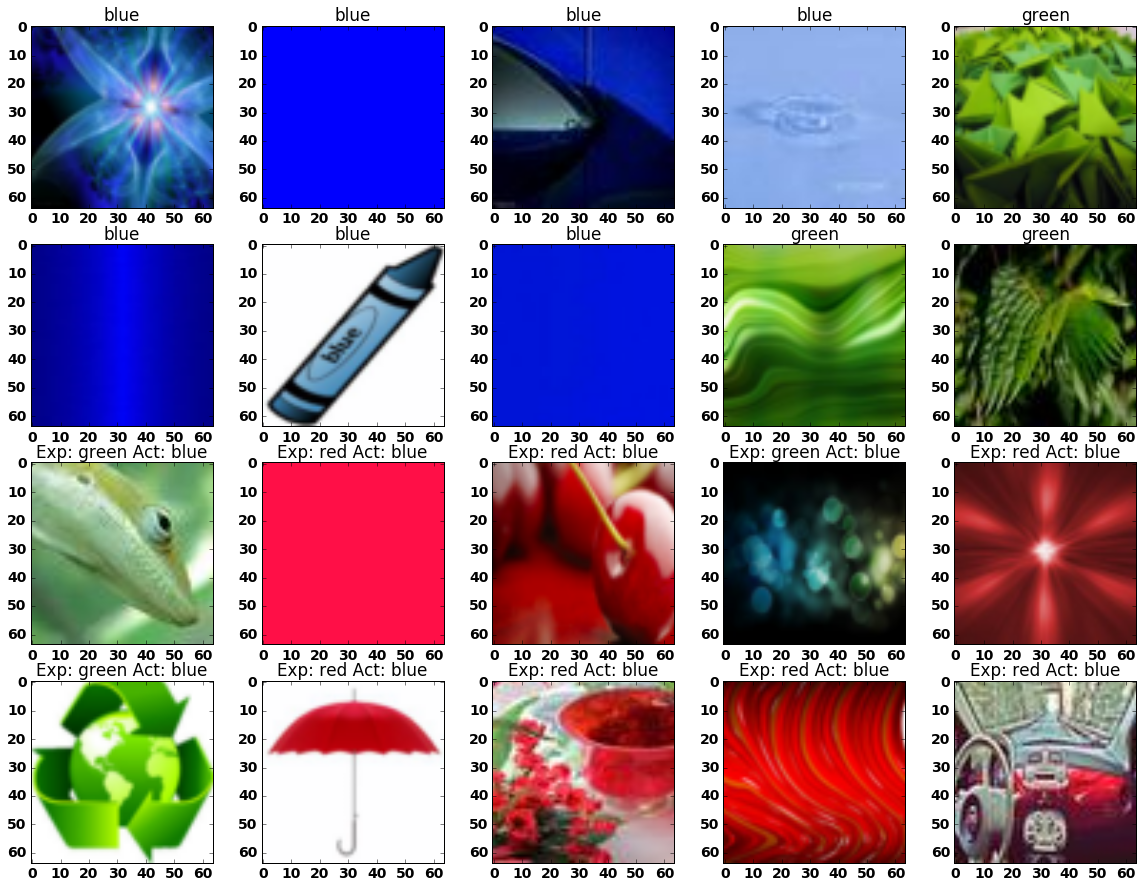

In [19]:
n = 4
m = 5
fig, axarr = plt.subplots(n, m)
fig.set_figwidth(20)
fig.set_figheight(15)

# Plot correct ones.
img_id = 0
for i in [0, 1]:
    for j in range(m):
        while img_id < y_cv.shape[0] and y_cv[img_id] != y_cv_pred[img_id]:
            img_id += 1
        if img_id < y_cv.shape[0] and y_cv[img_id] == y_cv_pred[img_id]:
            axarr[i,j].set_title(get_info(y_cv[img_id], y_cv_pred[img_id]))
            axarr[i,j].imshow(Image.fromarray(np.uint8(X_cv[img_id])))
            img_id += 1

# Plot wrong ones.
img_id = 0
for i in [2, 3]:
    for j in range(m):
        while img_id < y_cv.shape[0] and y_cv[img_id] == y_cv_pred[img_id]:
            img_id += 1
        if img_id < y_cv.shape[0] and y_cv[img_id] != y_cv_pred[img_id]:
            axarr[i,j].set_title(get_info(y_cv[img_id], y_cv_pred[img_id]))
            axarr[i,j].imshow(Image.fromarray(np.uint8(X_cv[img_id])))
            img_id += 1